<h1 align='center'> Get the most popular Python API List </h1>

Resources:
1. https://www.kaggle.com/code/ottoschnurr/gather-pypi-package-metadata
2. https://www.kaggle.com/code/ottoschnurr/query-anaconda-for-package-metadata
3. https://www.kaggle.com/code/ottoschnurr/query-notebook-for-installed-packages
4. https://hugovk.github.io/top-pypi-packages/

## Loading packages

In [1]:
import pandas as pd
import pkg_resources
import numpy as np
import requests
from lxml import html
import json

## Get current environment APIs

In [189]:
# this part is also executed in Colab and Kaggle notebooks
packages = sorted(
    (package for package in pkg_resources.working_set),
    key=lambda x: x.project_name
)

rows = [(package.project_name, package.version) for package in packages]

packages = pd.DataFrame(rows, columns=['package_name', 'version'])
packages.set_index('package_name', inplace=True)
packages.to_csv('data/API_inputs/local-notebook-packages.csv')

## Get Anaconda APIs for python3.11 linux 64

In [190]:
package_list_url = 'https://docs.anaconda.com/free/anaconda/reference/packages/py3.11_linux-64/'
page = requests.get(package_list_url)
tree = html.fromstring(page.content)
rows = tree.xpath('//table[@class="docutils"]//tr')
rows.pop(0);
package_names = [row.xpath('td[1]/a/text()')[0] for row in rows]

summaries_and_licenses = [row.xpath('td[3]/text()')[0].split(' / ') for row in rows]
summaries, licenses = [],[]
for i in summaries_and_licenses: 
    summaries.append(i[0])
    if len(i) > 1: licenses.append(i[1])
    else: licenses.append('None')
    
print(
    '{} package names, {} summaries, {} licenses'
    .format(len(package_names), len(summaries), len(licenses))
)

783 package names, 783 summaries, 783 licenses


In [191]:
columns = {
    'package_name': package_names,
    'summary': summaries,
    'license': licenses
}
anaconda_metadata = pd.DataFrame(columns)
anaconda_metadata.set_index('package_name', inplace=True)
anaconda_metadata.head()

,summary,license
package_name,,
_ipyw_jlab_nb_ext_conf,A configuration metapackage for enabling Anaco...,BSD
_libgcc_mutex,Mutex for libgcc and libgcc-ng,None
_openmp_mutex,OpenMP Implementation Mutex,BSD-3-Clause
abseil-cpp,Abseil Common Libraries (C++),Apache-2.0
affine,Matrices describing affine transformation of t...,BSD-3-Clause


In [192]:
anaconda_metadata.to_csv('data/API_inputs/anaconda-package-metadata.csv', header=True)

## Some collected APIs from PayPi

In [193]:
descriptions = [
    ('Babel', 'Internationalization utilities', 'BSD'),
    ('Baker', 'Easy, powerful access to Python functions from the command line', 'Apache 2.0'),
    ('Boruta', 'Python Implementation of Boruta Feature Selection', 'BSD 3 clause'),
    ('Bottleneck', 'Fast NumPy array functions written in C', 'Simplified BSD'),
    ('CVXcanon', 'A low-level library to perform the matrix building step in cvxpy, a convex optimization modeling software.', 'GPLv3'),
    ('CairoSVG', 'A Simple SVG Converter based on Cairo', 'LGPLv3+'),
    ('Cartopy', 'A cartographic python library with Matplotlib support for visualisation', 'LGPLv3'),
    ('Click', 'Composable command line interface toolkit', 'BSD'),
    ('ConfigArgParse', 'A drop-in replacement for argparse that allows options to also be set via config files and/or environment variables.', 'MIT'),
    ('Cython', 'The Cython compiler for writing C extensions for the Python language.', 'Apache'),
    ('Delorean', 'library for manipulating datetimes with ease and clarity', 'MIT license'),
    ('Deprecated', 'Python @deprecated decorator to deprecate old python classes, functions or methods.', 'MIT'),
    ('Fiona', 'Fiona reads and writes spatial data files', 'BSD'),
    ('Flask', 'A simple framework for building complex web applications.', 'BSD-3-Clause'),
    ('Flask-Cors', 'A Flask extension adding a decorator for CORS support', 'MIT'),
    ('Geohash', 'Module to decode/encode Geohashes to/from latitude and longitude.', 'GNU Affero GPL.'),
    ('ImageHash', 'Image Hashing library', 'BSD 2-clause (see LICENSE file)'),
    ('Janome', 'Japanese morphological analysis engine.', 'AL2'),
    ('Jinja2', 'A small but fast and easy to use stand-alone template engine written in pure python.', 'BSD'),
    ('Keras', 'Deep Learning for humans', 'MIT'),
    ('Keras-Applications', 'Reference implementations of popular deep learning models', 'MIT'),
    ('Keras-Preprocessing', 'Easy data preprocessing and data augmentation for deep learning models', 'MIT'),
    ('Lasagne', 'A lightweight library to build and train neural networks in Theano', 'MIT'),
    ('Mako', 'A super-fast templating language that borrows the  best ideas from the existing templating languages.', 'MIT'),
    ('Markdown', 'Python implementation of Markdown.', 'BSD License'),
    ('MarkupSafe', 'Safely add untrusted strings to HTML/XML markup.', 'BSD-3-Clause'),
    ('PDPbox', 'python partial dependence plot toolbox', 'MIT'),
    ('Pillow', 'Python Imaging Library (Fork)', np.nan),
    ('PyArabic', 'Arabic text tools for Python', 'GPL'),
    ('PyAstronomy', 'A collection of astronomy related tools for Python.', np.nan),
    ('PyBrain', 'PyBrain is the Swiss army knife for neural networking.', 'BSD'),
    ('PyOpenGL', 'Standard OpenGL bindings for Python', 'BSD'),
    ('PyPrind', 'Python Progress Bar and Percent Indicator Utility', 'BSD 3-Clause'),
    ('PySocks', 'A Python SOCKS client module. See https://github.com/Anorov/PySocks for more information.', 'BSD'),
    ('PyUpSet', 'Python implementation of the UpSet visualisation suite by Lex et al.', 'MIT'),
    ('PyWavelets', 'PyWavelets, wavelet transform module', 'MIT'),
    ('PyYAML', 'YAML parser and emitter for Python', 'MIT'),
    ('Pygments', 'Pygments is a syntax highlighting package written in Python.', 'BSD License'),
    ('Pympler', 'A development tool to measure, monitor and analyze the memory behavior of Python objects.', 'Apache License, Version 2.0'),
    ('Pyphen', 'Pure Python module to hyphenate text', np.nan),
    ('QtAwesome', 'FontAwesome icons in PyQt and PySide applications', 'MIT'),
    ('QtPy', 'Provides an abstraction layer on top of the various Qt bindings (PyQt5, PyQt4 and PySide) and additional custom QWidgets.', 'MIT'),
    ('Rtree', 'R-Tree spatial index for Python GIS', 'LGPL'),
    ('SQLAlchemy', 'Database Abstraction Library', 'MIT'),
    ('SecretStorage', 'Python bindings to FreeDesktop.org Secret Service API', 'BSD 3-Clause License'),
    ('Send2Trash', 'Send file to trash natively under Mac OS X, Windows and Linux.', 'BSD License'),
    ('Shapely', 'Geometric objects, predicates, and operations', 'BSD'),
    ('SimpleITK', 'SimpleITK is a simplified interface to the Insight Toolkit (ITK) for image registration and segmentation', 'Apache'),
    ('SoundFile', 'An audio library based on libsndfile, CFFI and NumPy', 'BSD 3-Clause License'),
    ('Sphinx', 'Python documentation generator', 'BSD'),
    ('TPOT', 'Tree-based Pipeline Optimization Tool', 'GNU/LGPLv3'),
    ('Theano', 'Optimizing compiler for evaluating mathematical expressions on CPUs and GPUs.', 'BSD'),
    ('Unidecode', 'ASCII transliterations of Unicode text', 'GPL'),
    ('Wand', 'Ctypes-based simple MagickWand API binding for Python', 'MIT License'),
    ('Werkzeug', 'The comprehensive WSGI web application library.', 'BSD-3-Clause'),
    ('Wordbatch', 'Python library for distributed AI processing pipelines, using swappable scheduler backends', 'GNU GPL 2.0'),
    ('XlsxWriter', 'A Python module for creating Excel XLSX files.', 'BSD'),
    ('absl-py', 'Abseil Python Common Libraries, see https://github.com/abseil/abseil-py.', 'Apache 2.0'),
    ('albumentations', 'Fast image augmentation library and easy to use wrapper around other libraries', 'MIT'),
    ('allennlp', 'An open-source NLP research library, built on PyTorch.', 'Apache'),
    ('altair', 'Altair: A declarative statistical visualization library for Python.', 'BSD 3-clause'),
    ('annoy', 'Approximate Nearest Neighbors in C++/Python optimized for memory usage and loading/saving to disk.', 'Apache License 2.0'),
    ('astor', 'Read/rewrite/write Python ASTs', 'BSD-3-Clause'),
    ('audioread', 'multi-library, cross-platform audio decoding', 'MIT'),
    ('backports.functools-lru-cache', 'backports.functools_lru_cache', np.nan),
    ('backports.shutil-get-terminal-size', "A backport of the get_terminal_size function from Python 3.3's shutil.", 'MIT'),
    ('backports.tempfile', "Backport of new features in Python's tempfile module", 'Python Software Foundation License'),
    ('bayesian-optimization', 'Bayesian Optimization package', np.nan),
    ('bayespy', 'Variational Bayesian inference tools for Python', np.nan),
    ('blis', 'The Blis BLAS-like linear algebra library, as a self-contained C-extension.', 'BSD'),
    ('branca', 'Generate complex HTML+JS pages with Python', 'Copyright (C) 2013, Martin Journois'),
    ('brewer2mpl', 'Connect colorbrewer2.org color maps to Python and matplotlib', 'UNKNOWN'),
    ('cachetools', 'Extensible memoizing collections and decorators', 'MIT'),
    ('cairocffi', 'cffi-based cairo bindings for Python', 'BSD'),
    ('catboost', 'Catboost Python Package', 'Apache License, Version 2.0'),
    ('category-encoders', 'A collection sklearn transformers to encode categorical variables as numeric', 'BSD'),
    ('cesium', 'Machine Learning Time-Series Platform', 'Modified BSD'),
    ('chainercv', np.nan, np.nan),
    ('cleverhans', np.nan, 'MIT'),
    ('cliff', 'Command Line Interface Formulation Framework', np.nan),
    ('cmd2', 'cmd2 - quickly build feature-rich and user-friendly interactive command line applications in Python', 'MIT'),
    ('cmudict', 'A versioned python wrapper package for The CMU Pronouncing Dictionary data files.', 'GPL-3.0'),
    ('colorlog', 'Log formatting with colors!', 'MIT License'),
    ('colorlover', 'Color scales for IPython notebook', np.nan),
    ('confuse', 'painless YAML configuration', 'MIT'),
    ('conllu', 'CoNLL-U Parser parses a CoNLL-U formatted string into a nested python dictionary', np.nan),
    ('convertdate', "Converts between Gregorian dates and other calendar systems.", 'MIT'),
    ('conx', 'On-Ramp to Deep Learning. Built on Keras', np.nan),
    ('cssselect2', 'CSS selectors for Python ElementTree', 'BSD'),
    ('cufflinks', 'Productivity Tools for Plotly + Pandas', 'MIT'),
    ('cvxpy', 'A domain-specific language for modeling convex optimization problems in Python.', 'Apache License, Version 2.0'),
    ('cymem', 'Manage calls to calloc/free through Cython', 'MIT'),
    ('cysignals', 'Interrupt and signal handling for Cython', 'GNU Lesser General Public License, version 3 or later'),
    ('dask-xgboost', 'Interactions between Dask and XGBoost', 'BSD'),
    ('dataclasses', 'A backport of the dataclasses module for Python 3.6', 'Apache'),
    ('deap', 'Distributed Evolutionary Algorithms in Python', 'LGPL'),
    ('deepdish', 'Deep Learning experiments from University of Chicago.', 'BSD'),
    ('descartes', 'Use geometric objects as matplotlib paths and patches', 'BSD'),
    ('dipy', 'Diffusion MRI utilities in python', 'BSD license'),
    ('dora', 'Exploratory data analysis toolkit for Python', 'MIT'),
    ('editdistance', 'Fast implementation of the edit distance(Levenshtein distance)', np.nan),
    ('edward', 'A library for probabilistic modeling, inference, and criticism', 'Apache License 2.0'),
    ('eli5', 'Debug machine learning classifiers and explain their predictions', 'MIT license'),
    ('emoji', 'Emoji for Python', 'New BSD'),
    ('essentia', 'Library for audio and music analysis, description and synthesis', 'AGPLv3'),
    ('et-xmlfile', 'An implementation of lxml.xmlfile for the standard library', 'MIT'),
    ('ethnicolr', 'Predict Race/Ethnicity Based on Name', 'MIT'),
    ('fancyimpute', 'Matrix completion and feature imputation algorithms', 'http://www.apache.org/licenses/LICENSE-2.0.html'),
    ('fastFM', np.nan, 'BSD'),
    ('fastai', 'fastai makes deep learning with PyTorch faster, more accurate, and easier', 'Apache Software License 2.0'),
    ('fasteners', 'A python package that provides useful locks.', 'ASL 2.0'),
    ('fastprogress', 'A nested progress with plotting options for fastai', 'Apache License 2.0'),
    ('fasttext', 'fasttext Python bindings', 'MIT'),
    ('fbpca', 'Fast computations of PCA/SVD/eigendecompositions via randomized methods', 'BSD License'),
    ('fbprophet', 'Automatic Forecasting Procedure', 'BSD'),
    ('feather-format', 'Simple wrapper library to the Apache Arrow-based Feather File Format', 'Apache License, Version 2.0'),
    ('featuretools', 'a framework for automated feature engineering', 'BSD 3-clause'),
    ('fitter', 'A tool to fit data to many distributions and best one(s)', 'GPL'),
    ('flashtext', 'Extract/Replaces keywords in sentences.', np.nan),
    ('folium', 'Make beautiful maps with Leaflet.js & Python', 'MIT'),
    ('fsspec', 'File-system specification', 'BSD'),
    ('ftfy', 'Fixes some problems with Unicode text after the fact', 'MIT'),
    ('funcsigs', 'Python function signatures from PEP362 for Python 2.6, 2.7 and 3.2+', 'ASL'),
    ('funcy', 'A fancy and practical functional tools', 'BSD'),
    ('fury', 'Free Unified Rendering in Python', 'BSD (3-clause)'),
    ('fuzzywuzzy', 'Fuzzy string matching in python', 'GPL'),
    ('gast', 'Python AST that abstracts the underlying Python version', 'BSD 3-Clause'),
    ('gatspy', 'General tools for Astronomical Time Series in Python', 'BSD 3-clause'),
    ('gdbn', 'Pre-trained deep neural networks', 'MIT (see license.txt)'),
    ('geographiclib', 'The geodesic routines from GeographicLib', 'MIT'),
    ('geojson', 'Python bindings and utilities for GeoJSON', 'BSD'),
    ('geopandas', 'Geographic pandas extensions', 'BSD'),
    ('geoplot', 'High-level geospatial plotting for Python.', np.nan),
    ('geopy', 'Python Geocoding Toolbox', 'MIT'),
    ('geoviews', 'GeoViews is a Python library that makes it easy to explore and visualize geographical datasets.', 'BSD 3-Clause'),
    ('ggplot', 'ggplot for python', 'BSD'),
    ('glmnet-py', 'Python version of glmnet, originally from Stanford University, modified by Han Fang', 'GPL-2'),
    ('gluoncv', 'MXNet Gluon CV Toolkit', 'Apache-2.0'),
    ('gluonnlp', 'MXNet Gluon NLP Toolkit', 'Apache-2.0'),
    ('gnumpy', "Almost identical to numpy, but does its computations on your computer's  GPU, using Cudamat.", 'BSD-derived (see LICENSE.txt)'),
    ('google-api-core', 'Google API client core library', 'Apache 2.0'),
    ('google-api-python-client', 'Google API Client Library for Python', 'Apache 2.0'),
    ('google-auth', 'Google Authentication Library', 'Apache 2.0'),
    ('google-auth-httplib2', 'Google Authentication Library: httplib2 transport', 'Apache 2.0'),
    ('google-cloud-automl', 'Cloud AutoML API client library', 'Apache 2.0'),
    ('google-cloud-bigquery', 'Google BigQuery API client library', 'Apache 2.0'),
    ('google-cloud-core', 'Google Cloud API client core library', 'Apache 2.0'),
    ('google-cloud-storage', 'Google Cloud Storage API client library', 'Apache 2.0'),
    ('google-pasta', 'pasta is an AST-based Python refactoring library', 'Apache 2.0'),
    ('google-resumable-media', 'Utilities for Google Media Downloads and Resumable Uploads', 'Apache 2.0'),
    ('googleapis-common-protos', 'Common protobufs used in Google APIs', 'Apache-2.0'),
    ('gplearn', 'Genetic Programming in Python, with a scikit-learn inspired API', 'new BSD'),
    ('gpxpy', 'GPX file parser and GPS track manipulation library', 'Apache License, Version 2.0'),
    ('grpcio', 'HTTP/2-based RPC framework', 'Apache License 2.0'),
    ('gym', 'The OpenAI Gym: A toolkit for developing and comparing your reinforcement learning agents.', np.nan),
    ('haversine', 'Calculate the distance between 2 points on Earth.', "['MIT']"),
    ('heamy', 'A set of useful tools for competitive data science.', 'MIT'),
    ('hep-ml', 'Machine Learning for High Energy Physics', 'Apache 2.0'),
    ('hmmlearn', np.nan, 'new BSD'),
    ('holidays', 'Generate and work with holidays in Python', 'MIT'),
    ('hpsklearn', 'Hyperparameter Optimization for sklearn', 'BSD'),
    ('htmlmin', 'An HTML Minifier', 'BSD'),
    ('httplib2', 'A comprehensive HTTP client library.', 'MIT'),
    ('hunspell', 'Module for the Hunspell spellchecker engine', 'LGPLv3'),
    ('husl', 'Human-friendly HSL', 'MIT'),
    ('hyperopt', 'Distributed Asynchronous Hyperparameter Optimization', 'BSD'),
    ('hypertools', 'A python package for visualizing and manipulating high-dimensional data', 'MIT'),
    ('hypothesis', 'A library for property based testing', 'MPL v2'),
    ('ijson', 'Iterative JSON parser with a standard Python iterator interface', 'BSD'),
    ('imbalanced-learn', 'Toolbox for imbalanced dataset in machine learning.', 'MIT'),
    ('imgaug', 'Image augmentation library for deep neural networks', 'MIT'),
    ('implicit', 'Collaborative Filtering for Implicit Datasets', 'MIT'),
    ('importlib-metadata', 'Read metadata from Python packages', 'Apache Software License'),
    ('ipython-genutils', 'Vestigial utilities from IPython', 'BSD'),
    ('iso3166', 'Self-contained ISO 3166-1 country definitions.', 'MIT'),
    ('isoweek', 'Objects representing a week', 'BSD'),
    ('jieba', 'Chinese Words Segementation Utilities', 'MIT'),
    ('jmespath', 'JSON Matching Expressions', 'MIT'),
    ('jsonnet', 'Python bindings for Jsonnet - The data templating language', np.nan),
    ('jsonpickle', 'Python library for serializing any arbitrary object graph into JSON', 'BSD'),
    ('jupyter-client', 'Jupyter protocol implementation and client libraries', 'BSD'),
    ('jupyter-console', 'Jupyter terminal console', 'BSD'),
    ('jupyter-core', 'Jupyter core package. A base package on which Jupyter projects rely.', 'BSD'),
    ('jupyter-tensorboard', 'Start tensorboard in Jupyter! Jupyter notebook integration for tensorboard.', 'MIT License'),
    ('jupyterlab-server', 'JupyterLab Server', 'BSD'),
    ('keras-rcnn', np.nan, 'MIT'),
    ('keras-resnet', np.nan, 'MIT'),
    ('keras-rl', 'Deep Reinforcement Learning for Keras', 'MIT'),
    ('keras-tqdm', 'Keras models with TQDM progress bars in Jupyter notebooks', 'MIT'),
    ('kmapper', 'Python implementation of Mapper algorithm for Topological Data Analysis.', 'MIT'),
    ('kmeans-smote', 'Oversampling for imbalanced learning based on k-means and SMOTE', 'MIT'),
    ('kmodes', 'Python implementations of the k-modes and k-prototypes clustering algorithms for clustering categorical data.', 'MIT'),
    ('knnimpute', 'k-Nearest Neighbor imputation', 'http://www.apache.org/licenses/LICENSE-2.0.html'),
    ('ktext', 'Pre-processing text in parallel for Keras in python.', 'MIT'),
    ('langdetect', "Language detection library ported from Google's language-detection.", 'Copyright 2014-2015 Michal "Mimino" Danilak, Apache License, Version 2.0'),
    ('langid', 'langid.py is a standalone Language Identification (LangID) tool.', 'BSD'),
    ('leven', 'Levenshtein edit distance library', 'UNKNOWN'),
    ('libarchive-c', 'Python interface to libarchive', 'CC0'),
    ('librosa', 'Python module for audio and music processing', 'ISC'),
    ('lief', 'LIEF is a library to instrument executable formats', 'Apache 2.0'),
    ('lightfm', 'LightFM recommendation model', 'MIT'),
    ('lightgbm', 'LightGBM Python Package', 'The MIT License (Microsoft)'),
    ('lime', 'Local Interpretable Model-Agnostic Explanations for machine learning classifiers', 'BSD'),
    ('line-profiler', 'Line-by-line profiler.', 'BSD'),
    ('lml', 'Load me later. A lazy plugin management system.', 'New BSD'),
    ('lunardate', 'A Chinese Calendar Library in Pure Python', 'GPLv3'),
    ('marisa-trie', 'Static memory-efficient and fast Trie-like structures for Python.', 'MIT'),
    ('markovify', 'A simple, extensible Markov chain generator. Uses include generating random semi-plausible sentences based on an existing text.', 'MIT'),
    ('matplotlib-venn', 'Functions for plotting area-proportional two- and three-way Venn diagrams in matplotlib.', 'MIT'),
    ('memory-profiler', 'A module for monitoring memory usage of a python program', 'BSD'),
    ('missingno', 'Missing data visualization module for Python.', np.nan),
    ('mizani', 'Scales for Python', 'BSD (3-clause)'),
    ('mkl-fft', 'MKL-based FFT transforms for NumPy arrays', 'Proprietary - Intel'),
    ('mkl-random', 'NumPy-based implementation of random number generation sampling using Intel (R) Math Kernel Library.', 'Proprietary - Intel'),
    ('ml-metrics', 'Machine Learning Evaluation Metrics', np.nan),
    ('mlcrate', 'A collection of handy python tools and functions, mainly for ML and Kaggle.', 'MIT'),
    ('mlens', 'Machine Learning Ensemble Library', 'MIT'),
    ('mlxtend', 'Machine Learning Library Extensions', 'BSD 3-Clause'),
    ('mmh3', 'Python wrapper for MurmurHash (MurmurHash3), a set of fast and robust hash functions.', 'License :: CC0 1.0 Universal (CC0 1.0) Public Domain Dedication'),
    ('mne', 'MNE python project for MEG and EEG data analysis.', 'BSD (3-clause)'),
    ('mnist', 'Python utilities to download and parse the MNIST dataset', 'BSD'),
    ('monotonic', 'An implementation of time.monotonic() for Python 2 & < 3.3', 'Apache'),
    ('mplleaflet', 'Convert Matplotlib plots into Leaflet web maps', 'BSD 3-clause'),
    ('msgpack', 'MessagePack (de)serializer.', 'Apache 2.0'),
    ('msgpack-numpy', 'Numpy data serialization using msgpack', 'BSD'),
    ('multiprocess', 'better multiprocessing and multithreading in python', 'BSD'),
    ('murmurhash', 'Cython bindings for MurmurHash', 'MIT'),
    ('mxnet', 'MXNet is an ultra-scalable deep learning framework. This version uses openblas.', 'Apache 2.0'),
    ('nervananeon', "Intel's deep learning framework", 'License :: OSI Approved :: Apache Software License'),
    ('nibabel', 'Access a multitude of neuroimaging data formats', 'MIT License'),
    ('nilearn', 'Statistical learning for neuroimaging in Python', 'new BSD'),
    ('nolearn', 'scikit-learn compatible neural network library', 'MIT'),
    ('numdifftools', 'Solves automatic numerical differentiation problems in one or more variables.', 'new BSD'),
    ('nvidia-ml-py3', 'Python Bindings for the NVIDIA Management Library', 'BSD'),
    ('odfpy', 'Python API and tools to manipulate OpenDocument files', np.nan),
    ('onnx', 'Open Neural Network Exchange', np.nan),
    ('opencv-python', 'Wrapper package for OpenCV python bindings.', 'MIT'),
    ('opencv-python-headless', 'Wrapper package for OpenCV python bindings.', 'MIT'),
    ('optuna', 'A hyperparameter optimization framework', np.nan),
    ('orderedmultidict', 'Ordered Multivalue Dictionary', 'Unlicense'),
    ('ortools', 'Google OR-Tools python libraries and modules', 'Apache 2.0'),
    ('osmnx', 'Retrieve, model, analyze, and visualize OpenStreetMap street networks and other spatial data', 'MIT'),
    ('osqp', 'OSQP: The Operator Splitting QP Solver', 'Apache 2.0'),
    ('overrides', 'A decorator to automatically detect mismatch when overriding a method.', 'Apache License, Version 2.0'),
    ('palettable', 'Color palettes for Python', np.nan),
    ('pandas-summary', 'An extension to pandas describe function.', 'MIT'),
    ('paramnb', 'Generate ipywidgets from Parameterized objects in the notebook', 'BSD 3-Clause License'),
    ('parsimonious', '(Soon to be) the fastest pure-Python PEG parser I could muster', 'MIT'),
    ('pathos', 'parallel graph management and execution in heterogeneous computing', '3-clause BSD'),
    ('pbr', 'Python Build Reasonableness', np.nan),
    ('pdf2image', 'A wrapper around the pdftoppm and pdftocairo command line tools to convert PDF to a PIL Image list.', 'MIT'),
    ('phik', 'Phi_K correlation analyzer library', np.nan),
    ('plotly-express', 'Plotly Express - a high level wrapper for Plotly.py', 'MIT'),
    ('plotnine', 'A grammar of graphics for python', 'GPL-2'),
    ('polyglot', 'Polyglot is a natural language pipeline that supports massive multilingual applications.', 'GPLv3'),
    ('posix-ipc', 'POSIX IPC primitives (semaphores, shared memory and message queues) for Python', 'http://creativecommons.org/licenses/BSD/'),
    ('pox', 'utilities for filesystem exploration and automated builds', '3-clause BSD'),
    ('ppca', 'Probabilistic PCA', np.nan),
    ('ppft', 'distributed and parallel python', 'BSD-like'),
    ('preprocessing', 'pre-processing package for text strings', 'MIT'),
    ('preshed', 'Cython hash table that trusts the keys are pre-hashed', 'MIT'),
    ('prettytable', 'A simple Python library for easily displaying tabular data in a visually appealing ASCII table format.', 'BSD'),
    ('progressbar2', 'A Python Progressbar library to provide visual (yet text based) progress to long running operations.', 'BSD'),
    ('prometheus-client', 'Python client for the Prometheus monitoring system.', 'Apache Software License 2.0'),
    ('prompt-toolkit', 'Library for building powerful interactive command lines in Python', 'BSD-3-Clause'),
    ('pronouncing', 'A simple interface for the CMU pronouncing dictionary', 'BSD'),
    ('pudb', 'A full-screen, console-based Python debugger', np.nan),
    ('py-cpuinfo', 'Get CPU info with pure Python 2 & 3', 'MIT'),
    ('py-lz4framed', 'LZ4Frame library for Python (via C bindings)', 'Apache License 2.0'),
    ('py-stringmatching', 'Python library for string matching.', 'BSD'),
    ('py-stringsimjoin', 'Python library for performing string similarity joins.', 'BSD'),
    ('pyLDAvis', 'Interactive topic model visualization. Port of the R package.', 'MIT'),
    ('pyOpenSSL', 'Python wrapper module around the OpenSSL library', 'Apache License, Version 2.0'),
    ('pyPdf', 'PDF toolkit', 'UNKNOWN'),
    ('pyahocorasick', 'pyahocorasick is a fast and memory efficient library for exact or approximate multi-pattern string search.', ' BSD-3-Clause and Public-Domain'),
    ('pyarrow', 'Python library for Apache Arrow', 'Apache License, Version 2.0'),
    ('pybind11', 'Seamless operability between C++11 and Python', 'BSD'),
    ('pycairo', 'Python interface for cairo', np.nan),
    ('pycountry', 'ISO country, subdivision, language, currency and script definitions and their translations', 'LGPL 2.1'),
    ('pyct', 'python package common tasks for users (e.g. copy examples, fetch data, ...)', 'BSD 3-Clause License'),
    ('pydash', 'The kitchen sink of Python utility libraries for doing "stuff" in a functional way. Based on the Lo-Dash Javascript library.', 'MIT License'),
    ('pydicom', 'Pure python package for DICOM medical file reading and writing', 'MIT'),
    ('pyexcel-io', 'A python library to read and write structured data in csv, zipped csvformat and to/from databases', 'New BSD'),
    ('pyexcel-ods', 'A wrapper library to read, manipulate and write data in ods format', 'New BSD'),
    ('pyfasttext', 'Yet another Python binding for fastText', 'GPLv3'),
    ('pyflux', 'PyFlux: A time-series analysis library for Python', 'BSD'),
    ('pyglet', 'Cross-platform windowing and multimedia library', 'BSD'),
    ('pykalman', 'An implementation of the Kalman Filter, Kalman Smoother, and EM algorithm in Python', 'BSD'),
    ('pykoko', 'KOKO is an easy-to-use entity extraction tool', 'Apache Software License 2.0'),
    ('pymagnitude', 'A fast, efficient universal vector embedding utility package.', 'MIT'),
    ('pyocr', 'A Python wrapper for OCR engines (Tesseract, Cuneiform, etc)', 'GPLv3+'),
    ('pypandoc', 'Thin wrapper for pandoc.', 'MIT'),
    ('pyperclip', 'A cross-platform clipboard module for Python. (Only handles plain text for now.)', 'BSD'),
    ('pytagcloud', 'Create beautiful tag clouds as images or HTML', 'BSD'),
    ('pytesseract', "Python-tesseract is a python wrapper for Google's Tesseract-OCR", 'GPLv3'),
    ('pytest-pylint', 'pytest plugin to check source code with pylint', 'MIT'),
    ('pytext-nlp', 'pytorch modeling framework and model zoo for text models', 'BSD'),
    ('python-Levenshtein', 'Python extension for computing string edit distances and similarities.', 'GPL'),
    ('python-igraph', 'High performance graph data structures and algorithms', 'GNU General Public License (GPL)'),
    ('python-louvain', 'Louvain algorithm for community detection', 'BSD'),
    ('pytorch-ignite', 'A lightweight library to help with training neural networks in PyTorch.', 'BSD'),
    ('pytorch-pretrained-bert', 'PyTorch version of Google AI BERT model with script to load Google pre-trained models', 'Apache'),
    ('pyviz-comms', 'Bidirectional communication for the PyViz ecosystem.', 'BSD'),
    ('raccoon', 'Python DataFrame with fast insert and appends', 'MIT'),
    ('randomgen', 'Random generator supporting multiple PRNGs', 'NCSA'),
    ('ray', 'A system for parallel and distributed Python that unifies the ML ecosystem.', 'Apache 2.0'),
    ('resampy', 'Efficient signal resampling', 'ISC'),
    ('retrying', 'Retrying', 'Apache 2.0'),
    ('revrand', 'A library of scalable Bayesian generalized linear models with fancy features', 'Apache Software License 2.0'),
    ('rf-perm-feat-import', 'Random Forest Permutate Feature Importance', 'MIT'),
    ('rgf-python', 'Scikit-learn Wrapper for Regularized Greedy Forest', 'MIT License'),
    ('rsa', 'Pure-Python RSA implementation', 'ASL 2'),
    ('ruamel-yaml', 'ruamel.yaml is a YAML parser/emitter that supports roundtrip preservation of comments, seq/map flow style, and map key order', 'MIT license'),
    ('s2sphere', 'Python implementation of the S2 Geometry Library', 'MIT'),
    ('s3transfer', 'An Amazon S3 Transfer Manager', 'Apache License 2.0'),
    ('sacred', 'Facilitates automated and reproducible experimental research', np.nan),
    ('scattertext', 'An NLP package to visualize interesting terms in text.', 'Apache 2.0'),
    ('scikit-multilearn', 'Scikit-multilearn is a BSD-licensed library for multi-label classification that is built on top of the well-known scikit-learn ecosystem.', 'BSD'),
    ('scikit-optimize', 'Sequential model-based optimization toolbox.', 'BSD'),
    ('scikit-plot', 'An intuitive library to add plotting functionality to scikit-learn objects.', 'MIT License'),
    ('scikit-surprise', 'An easy-to-use library for recommender systems.', 'GPLv3+'),
    ('scs', 'scs: splitting conic solver', 'MIT'),
    ('sentencepiece', 'SentencePiece python wrapper', 'Apache'),
    ('setuptools-git', 'Setuptools revision control system plugin for Git', 'BSD'),
    ('shap', 'A unified approach to explain the output of any machine learning model.', 'MIT'),
    ('sklearn', 'A set of python modules for machine learning and data mining', 'UNKNOWN'),
    ('sklearn-contrib-lightning', 'Large-scale sparse linear classification, regression and ranking in Python', 'new BSD'),
    ('sklearn-contrib-py-earth', "A Python implementation of Jerome Friedman's Multivariate Adaptive Regression Splines.", 'LICENSE.txt'),
    ('sklearn-pandas', 'Pandas integration with sklearn', np.nan),
    ('smart-open', 'Utils for streaming large files (S3, HDFS, gzip, bz2...)', 'MIT'),
    ('smhasher', 'Python extension for smhasher hash functions', 'UNKNOWN'),
    ('spectral', 'Spectral Python (SPy) is a Python module for hyperspectral image processing.', 'GPL'),
    ('speedml', 'Speedml Machine Learning Speed Start', 'MIT'),
    ('sphinx-rtd-theme', 'Read the Docs theme for Sphinx', 'MIT'),
    ('squarify', 'Pure Python implementation of the squarify treemap layout algorithm', 'Apache v2'),
    ('srsly', 'Modern high-performance serialization utilities for Python', 'MIT'),
    ('stemming', np.nan, np.nan),
    ('stevedore', 'Manage dynamic plugins for Python applications', np.nan),
    ('stop-words', 'Get list of common stop words in various languages in Python', 'Copyright (c) 2014, Alireza Savand, Contributors'),
    ('stopit', 'Timeout control decorator and context managers, raise any exception in another thread', 'GPLv3'),
    ('svgwrite', 'A Python library to create SVG drawings.', 'MIT License'),
    ('tables', 'Hierarchical datasets for Python', 'BSD 2-Clause'),
    ('tabulate', 'Pretty-print tabular data', 'MIT'),
    ('tensorboard', 'TensorBoard lets you watch Tensors Flow', 'Apache 2.0'),
    ('tensorboardX', 'TensorBoardX lets you watch Tensors Flow without Tensorflow', 'MIT license'),
    ('tensorflow-estimator', 'TensorFlow Estimator.', 'Apache 2.0'),
    ('tensorflow-hub', 'TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.', 'Apache 2.0'),
    ('tensorflow-probability', 'Probabilistic modeling and statistical inference in TensorFlow', 'Apache 2.0'),
    ('tensorforce', 'Reinforcement learning for TensorFlow', 'Apache 2.0'),
    ('tensorpack', 'A Neural Network Training Interface on TensorFlow', 'Apache'),
    ('terminalplot', 'Plot points in terminal', 'GPL'),
    ('textacy', 'NLP, before and after spaCy', 'Apache'),
    ('textblob', 'Simple, Pythonic text processing. Sentiment analysis, part-of-speech tagging, noun phrase parsing, and more.', 'MIT'),
    ('tflearn', 'Deep Learning Library featuring a higher-level API for TensorFlow', 'MIT'),
    ('thinc', 'Practical Machine Learning for NLP', 'MIT'),
    ('tifffile', 'Read and write TIFF(r) files', 'BSD'),
    ('tinycss2', 'Low-level CSS parser for Python', 'BSD'),
    ('torch', 'Tensors and Dynamic neural networks in Python with strong GPU acceleration', 'BSD-3'),
    ('torchaudio', 'An audio package for PyTorch', np.nan),
    ('torchtext', 'Text utilities and datasets for PyTorch', 'BSD'),
    ('trackml', 'An opinionated, minimal cookiecutter template for Python packages', np.nan),
    ('trueskill', 'The video game rating system', 'BSD'),
    ('tsfresh', 'tsfresh extracts relevant characteristics from time series', 'MIT'),
    ('typing-extensions', 'Backported and Experimental Type Hints for Python 3.5+', 'PSF'),
    ('tzlocal', 'tzinfo object for the local timezone', 'MIT'),
    ('umap-learn', 'Uniform Manifold Approximation and Projection', 'BSD'),
    ('update-checker', 'A python module that will check for package updates.', 'Simplified BSD License'),
    ('uritemplate', 'URI templates', 'BSD 3-Clause License or Apache License, Version 2.0'),
    ('urwid', 'A full-featured console (xterm et al.) user interface library', 'LGPL'),
    ('vecstack', 'Python package for stacking (machine learning technique)', 'MIT'),
    ('vega3', 'Deprecated: please use vega', 'BSD 3-clause'),
    ('vida', 'Python binding for Vida data visualizations', 'UNKNOWN'),
    ('vowpalwabbit', 'Vowpal Wabbit Python package', 'BSD 3-Clause License'),
    ('vtk', 'VTK is an open-source toolkit for 3D computer graphics, image processing, and visualization', 'BSD'),
    ('wasabi', 'A lightweight console printing and formatting toolkit', 'MIT'),
    ('wavio', 'A Python module for reading and writing WAV files using numpy arrays.', 'BSD'),
    ('websocket-client', 'WebSocket client for Python. hybi13 is supported.', 'BSD'),
    ('wfdb', 'The WFDB Python Toolbox', 'MIT'),
    ('word2number', 'Convert number words eg. three hundred and forty two to numbers (342).', 'MIT'),
    ('wordcloud', 'A little word cloud generator', 'MIT'),
    ('wordsegment', 'English word segmentation.', 'Apache 2.0'),
    ('xgboost', 'XGBoost Python Package', 'Apache-2.0'),
    ('xvfbwrapper', 'run headless display inside X virtual framebuffer (Xvfb)', 'MIT'),
    ('xxhash', 'Python binding for xxHash', 'BSD'),
    ('yellowbrick', 'A suite of visual analysis and diagnostic tools for machine learning.', 'Apache 2'),
]

pypi_metadata = pd.DataFrame(
    descriptions,
    columns=['package_name', 'summary', 'license']
)
pypi_metadata.set_index('package_name', inplace=True)
pypi_metadata.to_csv('data/API_inputs/pypi-package-metadata.csv', header=True)

## Merge All collected APIs

In [3]:
# get colab APIS
package_list_url_colab = 'data/API_inputs/colab-notebook-packages.csv'
package_list_colab = pd.read_csv(package_list_url_colab)
package_list_colab.set_index('package_name', inplace=True)
print(len(package_list_colab))

# get kaggle APIS
package_list_url_kaggle = 'data/API_inputs/kaggle-notebook-packages.csv'
package_list_kaggle = pd.read_csv(package_list_url_kaggle)
package_list_kaggle.set_index('package_name', inplace=True)
print(len(package_list_kaggle))

# get my device APIS
package_list_url_my_device = 'data/API_inputs/local-notebook-packages.csv'
package_list_my_device = pd.read_csv(package_list_url_my_device)
package_list_my_device.set_index('package_name', inplace=True)
print(len(package_list_my_device))
package_list_my_device.head()

443
818
354


,version
package_name,
Babel,2.12.1
Brlapi,0.8.3
Brotli,1.0.9
Cython,0.29.35
Django,3.2.19


In [4]:
# load anaconda APIs list
anaconda_url = 'data/API_inputs/anaconda-package-metadata.csv'

anaconda_metadata = pd.read_csv(anaconda_url)
anaconda_metadata.set_index('package_name', inplace=True)
anaconda_metadata.insert(2, 'metadata_source', 'Anaconda')
print(len(anaconda_metadata))
anaconda_metadata.head()

783


,summary,license,metadata_source
package_name,,,
_ipyw_jlab_nb_ext_conf,A configuration metapackage for enabling Anaco...,BSD,Anaconda
_libgcc_mutex,Mutex for libgcc and libgcc-ng,None,Anaconda
_openmp_mutex,OpenMP Implementation Mutex,BSD-3-Clause,Anaconda
abseil-cpp,Abseil Common Libraries (C++),Apache-2.0,Anaconda
affine,Matrices describing affine transformation of t...,BSD-3-Clause,Anaconda


In [5]:
# load pypi APIs list
pypi_url = 'data/API_inputs/pypi-package-metadata.csv'

pypi_metadata = pd.read_csv(pypi_url)
pypi_metadata.set_index('package_name', inplace=True)
pypi_metadata.insert(2, 'metadata_source', 'PyPI')
print(len(pypi_metadata))
pypi_metadata.head()

385


,summary,license,metadata_source
package_name,,,
Babel,Internationalization utilities,BSD,PyPI
Baker,"Easy, powerful access to Python functions from...",Apache 2.0,PyPI
Boruta,Python Implementation of Boruta Feature Selection,BSD 3 clause,PyPI
Bottleneck,Fast NumPy array functions written in C,Simplified BSD,PyPI
CVXcanon,A low-level library to perform the matrix buil...,GPLv3,PyPI


In [6]:
# load top-pypi-packages-30-days
# Last updated 2023-08-01 08:13:19.
data = json.load(open('data/API_inputs/top-pypi-packages-30-days.json'))
project, download_count = [],[]
for i in data['rows']: 
    project.append(i['project'])
    download_count.append(i['download_count'])
    
columns = {
    'package_name': project,
    'download_count': download_count,
}
top_pypi_packages_metadata = pd.DataFrame(columns)
top_pypi_packages_metadata.set_index('package_name', inplace=True)
print(len(top_pypi_packages_metadata))
top_pypi_packages_metadata.head()

5000


,download_count
package_name,
boto3,719072639
urllib3,329215565
botocore,320415214
requests,284144318
setuptools,246176073


In [198]:
merged_df = package_list_colab \
    .merge(package_list_kaggle, how='outer', on=['package_name'])\
    .merge(package_list_my_device, how='outer', on='package_name')\
    .merge(anaconda_metadata, how='outer', on='package_name') \
    .merge(pypi_metadata, how='outer', on='package_name') \
    .merge(top_pypi_packages_metadata, how='outer', on='package_name') 

In [199]:
merged_df = merged_df
merged_df['version'] = merged_df[['version', 'version_x','version_y']].apply(
    lambda x: (
        y := [str(e) for e in x if str(e) != 'nan'],
        max(y) if len(y)!=0 else None
    )[1] 
    , axis=1)
merged_df['summary'] = merged_df[['summary_x','summary_y']].apply(
    lambda x: x[0] if str(x[0]) != 'nan' else x[1]
    , axis=1)
merged_df['license'] = merged_df[['license_x','license_y']].apply(
    lambda x: x[0] if str(x[0]) != 'nan' else x[1]
    , axis=1)
merged_df['metadata_source'] = merged_df[['metadata_source_x','metadata_source_y']].apply(
    lambda x: x[0] if str(x[0]) != 'nan' != None else x[1]
    , axis=1)
merged_df = merged_df.drop(columns=['version_x', 'version_y', 'summary_x','summary_y', 'license_x','license_y','metadata_source_x','metadata_source_y'])

In [200]:
print(merged_df.info())

merged_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, Babel to crowdstrike-falconpy
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   version          1051 non-null   object 
 1   download_count   5000 non-null   float64
 2   summary          1144 non-null   object 
 3   license          1117 non-null   object 
 4   metadata_source  1152 non-null   object 
dtypes: float64(1), object(4)
memory usage: 264.5+ KB
None


,version,download_count,summary,license,metadata_source
package_name,,,,,
pyparsing,3.1.1,71907359.0,Create and execute simple grammars,MIT,Anaconda
Wand,0.6.11,NaN,Ctypes-based simple MagickWand API binding for...,MIT License,PyPI
typed-ast,None,7232406.0,NaN,NaN,NaN
mpi4py,None,145408.0,Python bindings for MPI,BSD-2-Clause,Anaconda
requests-toolbelt,0.10.1,41899366.0,NaN,NaN,NaN
CairoSVG,None,NaN,A Simple SVG Converter based on Cairo,LGPLv3+,PyPI
pyrtf3,None,304393.0,NaN,NaN,NaN
libbrotlidec,None,NaN,Brotli compression format,MIT,Anaconda
pretty-html-table,None,615711.0,NaN,NaN,NaN


In [201]:
merged_df.to_csv('data/results/package-dataframe.csv', header=True)

## Data analysis after collect it with Scrapy

In [7]:
dataset = 'pypiscrapy/pypi_dataset.csv'
df = pd.read_csv(dataset)
df.set_index('name', inplace=True)
df.sample(10)

,version,install_command,release_date,release_year,old_version,old_release_date,old_release_year,url
name,,,,,,,,
logging,0.4.9.6,pip install logging,2013-06-04,2013,0.4.9.2,2004-06-30,2004,https://pypi.org/project/logging/
humanize,4.8.0,pip install humanize,2023-08-16,2023,0.1,2011-10-12,2011,https://pypi.org/project/humanize/
tryme,0.0.5,pip install tryme,2017-09-24,2017,0.0.1,2017-09-20,2017,https://pypi.org/project/tryme/
azure-mgmt-applicationinsights,4.0.0,pip install azure-mgmt-applicationinsights,2023-04-20,2023,0.1.0,2018-01-17,2018,https://pypi.org/project/azure-mgmt-applicatio...
sampleproject,3.0.0,pip install sampleproject,2022-12-01,2022,1.0,2015-06-14,2015,https://pypi.org/project/sampleproject/
sphinxcontrib-napoleon,0.7,pip install sphinxcontrib-napoleon,2018-09-23,2018,0.1dev-20130718,2013-07-18,2013,https://pypi.org/project/sphinxcontrib-napoleon/
bravado,11.0.3,pip install bravado,2021-03-02,2021,1.0.0-rc1,2015-05-14,2015,https://pypi.org/project/bravado/
textblob,0.17.1,pip install textblob,2021-10-22,2021,0.1,2013-07-01,2013,https://pypi.org/project/textblob/
azure-mgmt-machinelearningcompute,0.4.1,pip install azure-mgmt-machinelearningcompute,2018-05-29,2018,0.1.0,2017-09-22,2017,https://pypi.org/project/azure-mgmt-machinelea...


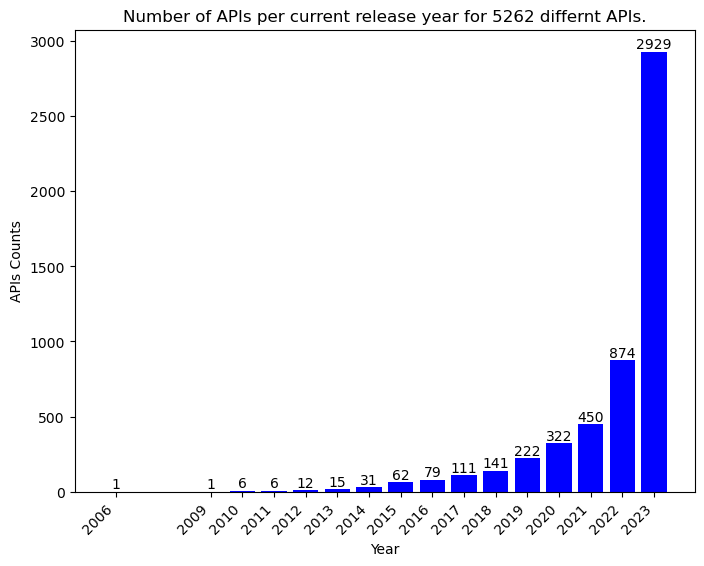

In [31]:
import matplotlib.pyplot as plt
from collections import Counter

data = df['release_year']
counter = Counter(data)

unique_elements = list(counter.keys())
counts = list(counter.values())

plt.figure(figsize=(8, 6))
bars = plt.bar(unique_elements, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('APIs Counts')
plt.title('Number of APIs per current release year for '+str(len(data))+' differnt APIs.')
plt.xticks(rotation=45, ha="right")
plt.xticks(unique_elements)
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')


plt.show()

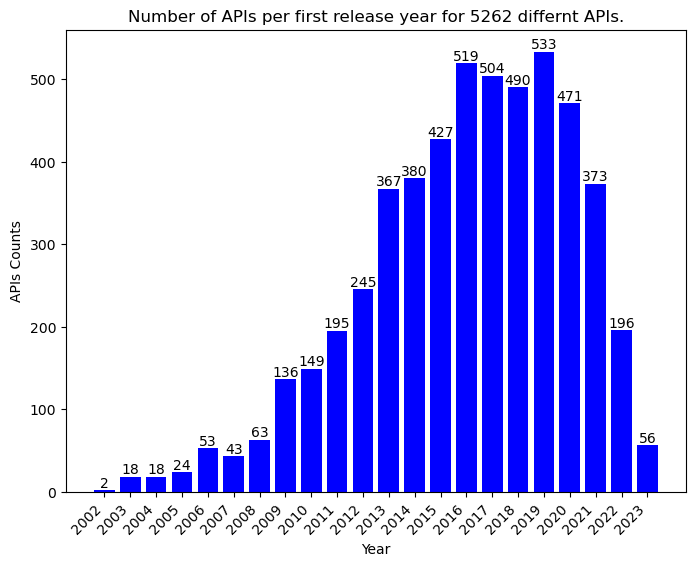

In [33]:
import matplotlib.pyplot as plt
from collections import Counter

data = df['old_release_year']
counter = Counter(data)

unique_elements = list(counter.keys())
counts = list(counter.values())

plt.figure(figsize=(8, 6))
bars = plt.bar(unique_elements, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('APIs Counts')
plt.title('Number of APIs per first release year for '+str(len(data))+' differnt APIs.')
plt.xticks(rotation=45, ha="right")
plt.xticks(unique_elements)
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')


plt.show()

In [8]:
# get all APIs that released after 01/04/2022
df['old_release_date'] = pd.to_datetime(df['old_release_date'], format='%Y-%m-%d')

In [250]:
mask = (df['old_release_date'] >= '2022-4-1')
df = df.loc[mask]
print("Number of APIs that released after 01/04/2022: ",len(df))

Number of APIs that released after 01/04/2022:  189


In [251]:
df.sample(50)

,version,install_command,release_date,release_year,old_version,old_release_date,old_release_year,url
name,,,,,,,,
types-tqdm,4.66.0.1,pip install types-tqdm,2023-08-11,2023,4.64.0,2022-07-05,2022,https://pypi.org/project/types-tqdm/
ypy-websocket,0.12.1,pip install ypy-websocket,2023-06-20,2023,0.1.1,2022-04-26,2022,https://pypi.org/project/ypy-websocket/
peft,0.4.0,pip install peft,2023-07-17,2023,0.0.1,2023-01-19,2023,https://pypi.org/project/peft/
tensorflow-cpu-aws,2.13.0,pip install tensorflow-cpu-aws,2023-07-05,2023,2.9.1,2022-05-31,2022,https://pypi.org/project/tensorflow-cpu-aws/
linear-operator,0.5.1,pip install linear-operator,2023-08-01,2023,0.1.0,2022-08-11,2022,https://pypi.org/project/linear-operator/
python-keycloak,3.3.0,pip install python-keycloak,2023-06-27,2023,0.0.0,2022-05-19,2022,https://pypi.org/project/python-keycloak/
dbus-fast,1.92.0,pip install dbus-fast,2023-08-18,2023,1.0.0,2022-09-09,2022,https://pypi.org/project/dbus-fast/
PyDrive2,1.17.0,pip install PyDrive2,2023-08-15,2023,0.14.0,2022-07-22,2022,https://pypi.org/project/PyDrive2/
google-cloud-run,0.9.1,pip install google-cloud-run,2023-08-03,2023,0.1.0,2022-04-04,2022,https://pypi.org/project/google-cloud-run/


In [253]:
df.to_csv('data/results/API_list_Released_3_22.csv', header=True)

In [4]:
# get all APIs that has new version after 8/2023
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

In [11]:
mask = (df['release_date'] >= '2023-8-1')
df = df.loc[mask]
mask = (df['old_release_date'] < '2022-4-1')
df = df.loc[mask]
print("Number of APIs that has new version released after 01/08/2023: ",len(df))

Number of APIs that has new version released after 01/08/2023:  695


In [12]:
df.sample(50)

,version,install_command,release_date,release_year,old_version,old_release_date,old_release_year,url
name,,,,,,,,
mypy-boto3-stepfunctions,1.28.16,pip install mypy-boto3-stepfunctions,2023-08-01,2023,0.1.6,2019-11-09,2019,https://pypi.org/project/mypy-boto3-stepfuncti...
sh,2.0.6,pip install sh,2023-08-10,2023,0.01,2012-03-23,2012,https://pypi.org/project/sh/
grpcio-testing,1.57.0,pip install grpcio-testing,2023-08-10,2023,1.13.0rc2,2018-06-20,2018,https://pypi.org/project/grpcio-testing/
drf-extra-fields,3.7.0,pip install drf-extra-fields,2023-08-08,2023,3.0.2,2020-09-22,2020,https://pypi.org/project/drf-extra-fields/
joblib,1.3.2,pip install joblib,2023-08-09,2023,0.3.2d.dev,2009-09-01,2009,https://pypi.org/project/joblib/
mo-future,7.428.23214,pip install mo-future,2023-08-02,2023,1.0.17328,2017-11-24,2017,https://pypi.org/project/mo-future/
google-cloud-translate,3.12.0,pip install google-cloud-translate,2023-08-08,2023,0.0.1,2016-09-20,2016,https://pypi.org/project/google-cloud-translate/
discord.py,2.3.2,pip install discord.py,2023-08-10,2023,0.1.0,2015-08-23,2015,https://pypi.org/project/discord.py/
construct-typing,0.6.2,pip install construct-typing,2023-08-03,2023,0.1.0,2021-01-03,2021,https://pypi.org/project/construct-typing/


In [13]:
df.to_csv('data/results/API_list_with_new_v_aft_8_23.csv', header=True)

In [ ]:
# API_list_Released_3_22 and API_list_with_new_v_aft_8_23 was processed
# Manually and select 50 APIs as the Final list exist in APIs_list.csv